In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

sns.set_theme()

In [24]:
characterization_files = [
    "data\\u1_xl3d.csv",
    "data\\u2_xl3d.csv",
]
all_frames = []
for data_file in characterization_files:
    data = pd.read_csv(
        data_file,
    )
    all_frames.append(data)

all_data = pd.concat(all_frames)
all_data = all_data.reset_index(drop=True)
display(all_data)

,Samples averaged,Raw X,Raw Y,Raw Z,QTPy identifier
0,1,0.860001,0.500000,21.0800,24ec4a1dd628
1,1,0.860001,-0.500000,20.0800,24ec4a1dd628
2,1,-0.139999,0.500000,21.0800,24ec4a1dd628
3,1,-0.139999,0.500000,20.0800,24ec4a1dd628
4,1,-0.139999,-0.500000,21.0800,24ec4a1dd628
...,...,...,...,...,...
595,2000,0.023500,0.010500,20.3135,48ca43576cdc
596,2000,0.065000,0.003500,20.3445,48ca43576cdc
597,2000,0.073500,0.016501,20.3610,48ca43576cdc
598,2000,0.041500,0.003500,20.3040,48ca43576cdc


# Scale factor

With 1g +Z reference sensor data, adjust the scaling constant until the scaled box plot converges on 1g

In [25]:
u1_scale_factor = 48.62e-3
u2_scale_factor = 49.15e-3

def scale_z_by_qtpy_id(row):
    scaling_factor = u1_scale_factor
    if row["QTPy identifier"] == "48ca43576cdc":
        scaling_factor = u2_scale_factor
    return row["Raw Z"] * scaling_factor

all_data["Scaled Z (g)"] = all_data.apply(scale_z_by_qtpy_id, axis="columns")
display(all_data)

,Samples averaged,Raw X,Raw Y,Raw Z,QTPy identifier,Scaled Z (g)
0,1,0.860001,0.500000,21.0800,24ec4a1dd628,1.024910
1,1,0.860001,-0.500000,20.0800,24ec4a1dd628,0.976290
2,1,-0.139999,0.500000,21.0800,24ec4a1dd628,1.024910
3,1,-0.139999,0.500000,20.0800,24ec4a1dd628,0.976290
4,1,-0.139999,-0.500000,21.0800,24ec4a1dd628,1.024910
...,...,...,...,...,...,...
595,2000,0.023500,0.010500,20.3135,48ca43576cdc,0.998409
596,2000,0.065000,0.003500,20.3445,48ca43576cdc,0.999932
597,2000,0.073500,0.016501,20.3610,48ca43576cdc,1.000743
598,2000,0.041500,0.003500,20.3040,48ca43576cdc,0.997942


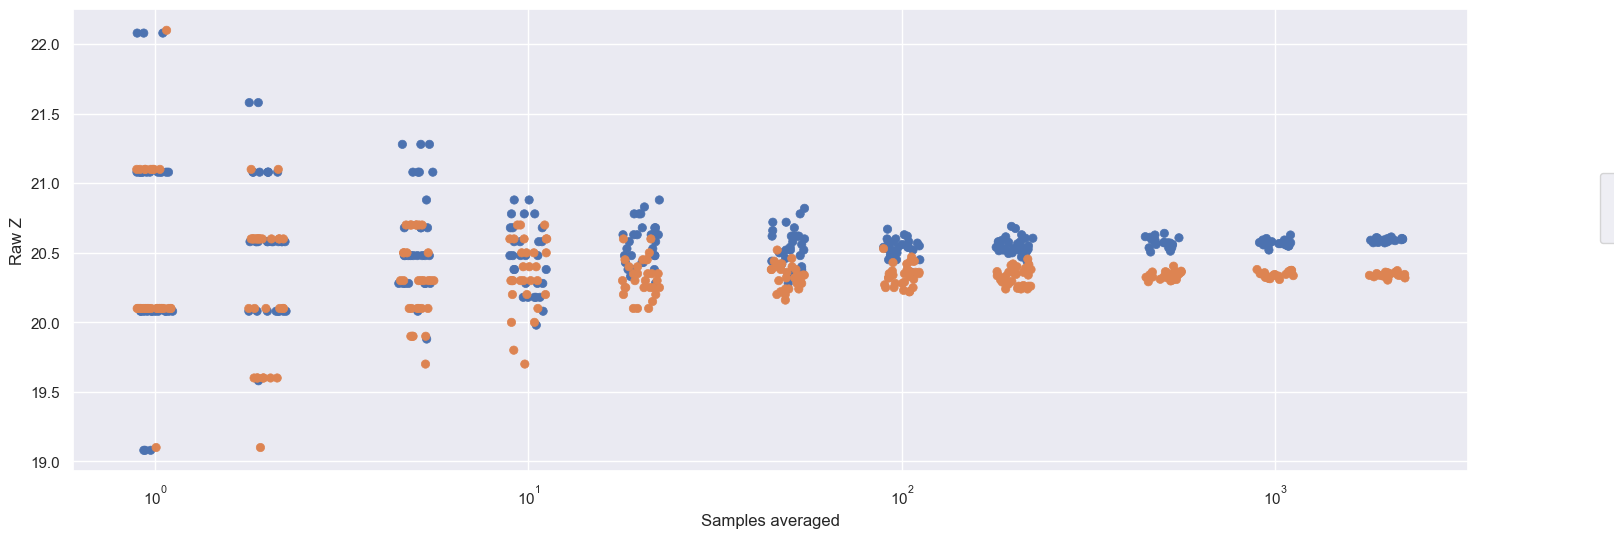

In [26]:
figure = plt.figure(figsize=(18,6))

plot = (
    so.Plot(
        all_data,
        x="Samples averaged",
        y="Raw Z",
        color="QTPy identifier",
    )
    .add(so.Dot(), so.Jitter(x=0.1))
    .scale(x="log")
    .on(figure)
)

plot.show()

In [27]:
by_qtpy = all_data.groupby(["QTPy identifier"])
display(by_qtpy.size())

QTPy identifier
24ec4a1dd628    300
48ca43576cdc    300
dtype: int64

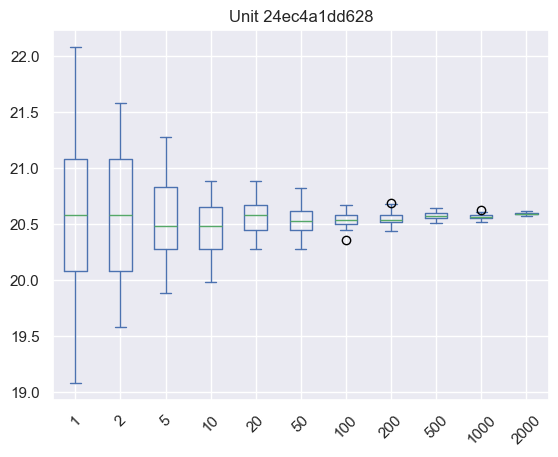

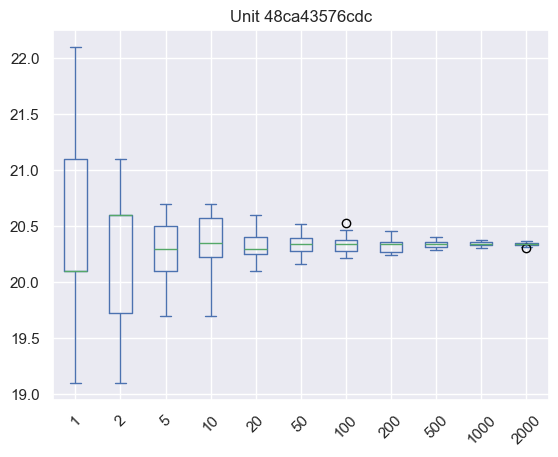

In [28]:
for name, subframe in by_qtpy:
    title = f"Unit {name[0]}"
    boxplot = subframe.plot.box(by="Samples averaged", column="Raw Z", rot=45)
    for axis in boxplot:
        axis.set_title(title)

In [29]:
std_frames = []
for name, subframe in by_qtpy:
    title = f"Unit {name[0]}"
    std_by_averages = subframe.groupby("Samples averaged")["Raw Z"].std()
    qtpy_xl3d_std = pd.DataFrame({
        "QTPy identifier": name[0],
        "std": std_by_averages,
    })
    std_frames.append(qtpy_xl3d_std)

all_std_frames = pd.concat(std_frames)
display(all_std_frames)

,QTPy identifier,std
Samples averaged,,
1,24ec4a1dd628,0.820008
2,24ec4a1dd628,0.482153
5,24ec4a1dd628,0.373612
10,24ec4a1dd628,0.245511
20,24ec4a1dd628,0.155188
50,24ec4a1dd628,0.136102
100,24ec4a1dd628,0.063405
200,24ec4a1dd628,0.057934
500,24ec4a1dd628,0.036921


In [30]:
std_bar_groups = all_std_frames.groupby(["QTPy identifier"])
std_bars_by_qtpy = pd.DataFrame()
for name, subframe in std_bar_groups:
    column_name = f"Unit {name[0]}"
    std_bars_by_qtpy[column_name] = subframe["std"]

display(std_bars_by_qtpy)

,Unit 24ec4a1dd628,Unit 48ca43576cdc
Samples averaged,,
1,0.820008,0.595963
2,0.482153,0.511084
5,0.373612,0.294704
10,0.245511,0.255604
20,0.155188,0.132353
50,0.136102,0.086357
100,0.063405,0.079565
200,0.057934,0.061905
500,0.036921,0.029007


Text(0, 0.5, 'Raw Z std')

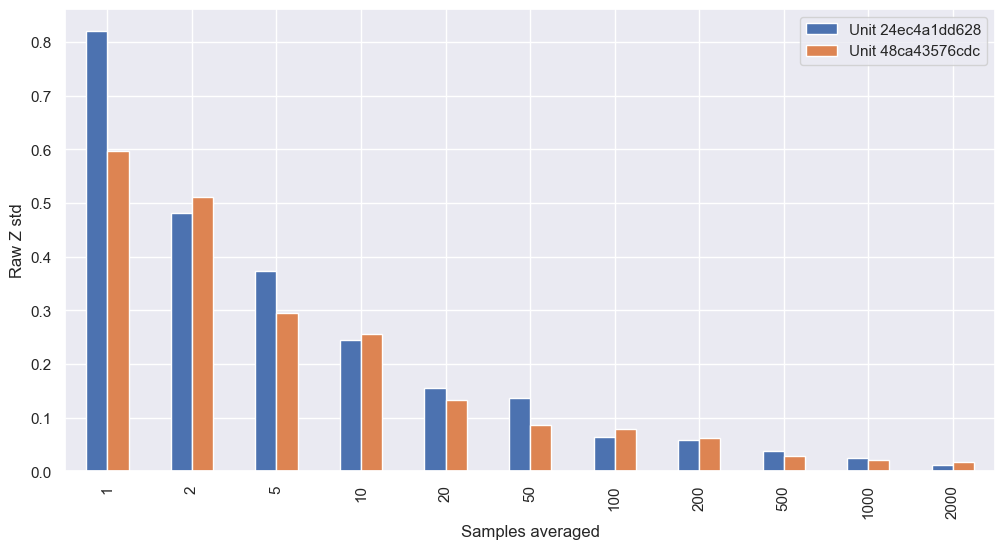

In [31]:
std_bars = std_bars_by_qtpy.plot.bar(figsize=(12,6))
std_bars.set_ylabel("Raw Z std")

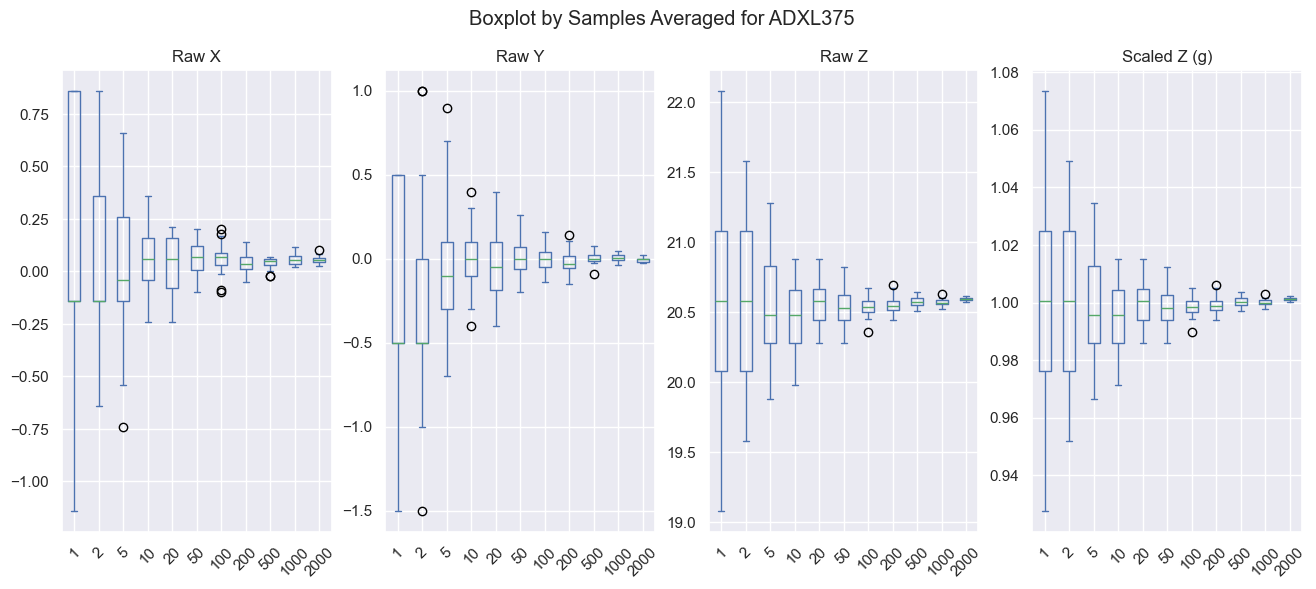

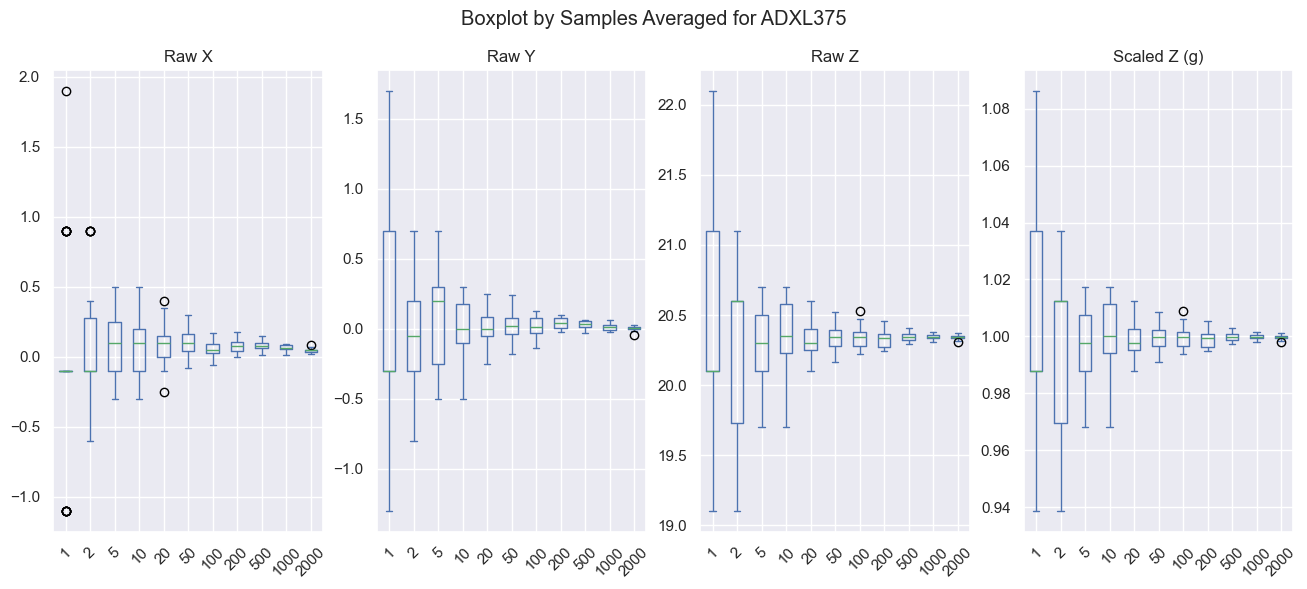

In [32]:
boxen = all_data.groupby("QTPy identifier").plot.box(by="Samples averaged", figsize=(16, 6), rot=45, title="Boxplot by Samples Averaged for ADXL375")